Q1：

1. 从任意金融数据开源API获取10家市值最大的银行行业的上市公司从去年年初至今的股票的日行情数据，
2. 从上述10支股票中随机挑选出四支绘制2x2的子图，横轴为日期，纵轴为收盘价，其中上面两幅子图的横轴不显示；子图1、3为折线图，子2、4为柱状图；为该图添加名为"银行股"的中文标题；在图1、3中，以透明度为80%的蓝色填充大于1.5倍均值的部分。

In [ ]:
import tushare as ts
import random

tushare_token = '1c8b06446534ae510c8c68e38fc248b99f89ac3814cb55645ae2be72'  # 请在 tushare.pro 网站注册并且告知学生身份，可以取得你的token
pro = ts.pro_api(tushare_token)

data = pro.stock_basic(exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date') # 获取所有股票代码
bank=data[data['industry']=='银行'] # 获取银行股的股票代码
bank.reset_index(drop=True)

In [ ]:
stocklist = pro.daily_basic(ts_code='', trade_date='20200104', fields='ts_code,trade_date,total_share,float_share') # 获取所有股票的市值/流通市值
stocklist

In [ ]:
import pandas as pd

banklist=pd.merge(bank, stocklist, how='inner', on='ts_code') # 获取银行股的市值/流通市值
banklist

In [ ]:
banklist.sort_values(by='total_share',ascending=False).head(10) 

In [ ]:
codes=banklist.sort_values(by='total_share',ascending=False).head(10).ts_code.to_list() # 获取十支市值最大的银行股代码
code=','.join(codes)
code

In [ ]:
df = pro.daily(ts_code=code, start_date='20190101', end_date='20201201') # 获取十支市值最大的银行股代码的日线行情数据

In [ ]:
codes=df['ts_code'].drop_duplicates().to_list() # 绘图前的数据预处理
df00=[]
for code in codes:
    df00.append(df[df['ts_code']==code].set_index('trade_date'))

stk=pd.concat(df00, axis=1, join='inner')['close'].iloc[::-1,:]
stk.columns=codes
# stk.index=stk.index.astype(str)
stk

In [ ]:
df2=stk.iloc[:,random.sample(range(10),4)] # 随机选取四支
df2

In [ ]:
import matplotlib.pyplot as plt #绘图

fig = plt.figure(figsize=(20,10))
plt.rcParams['font.family']=['STFangsong']    #配置中文字体为仿宋
fig.suptitle("银行股")

plt.subplot(2,2,1)
plt.plot(df2[df2.columns[0]])
plt.xticks([])
plt.xlabel('date')
plt.fill_between(df2.index, df2[df2.columns[0]].mean()*1.5, df2[df2.columns[0]], alpha=0.8, color='b')

plt.subplot(2,2,2)
df2[df2.columns[1]].plot(kind='bar')
plt.xticks([])
plt.xlabel('date')

plt.subplot(2,2,3)
plt.plot(df2[df2.columns[2]])
plt.xticks(df2.index[::100])
plt.xlabel('date')
plt.fill_between(df2.index, df2[df2.columns[2]].mean()*1.5, df2[df2.columns[2]], alpha=0.8, color='b')

plt.subplot(2,2,4)
df2[df2.columns[3]].plot(kind='bar')
plt.xticks(range(0,len(df2),100),df2.index[::100])
plt.xlabel('date')

plt.show()

Q2：

从网页 http://www.gov.cn/guowuyuan/zfgzbg.htm 提取政府工作报告，并绘制关键词的词云图。

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

url="http://www.gov.cn/guowuyuan/zfgzbg.htm"
     
def request_url(url):
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.109 Safari/537.36'
    headers = {'User-Agent': user_agent} 
    
    res = requests.get(url,headers=headers)
    res.encoding = 'utf-8'
    return res.text

## 获取网页
soup = BeautifulSoup(request_url(url), 'html.parser')
soup.prettify()

## 提取网页信息
text = [i for i in soup.find_all(name='div', attrs={'class':'content'})[0].stripped_strings]
text = ''.join(text[9:-10])
text

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import jieba
import numpy as np
import jieba.analyse as analyse

## 使用jieba提取关键词
keywords = analyse.textrank(text, topK=30, withWeight=True)
keywords

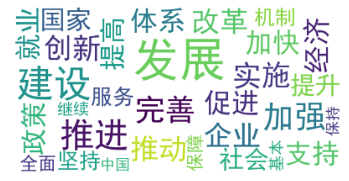

In [38]:
## 绘制词云图
wc =  WordCloud(font_path="simhei.ttf", background_color='white')
my_wordcloud = wc.fit_words(dict(keywords))

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()

Q3：

1. 读取本地的'sina_fin_news.csv'文件（可从github上下载）
2. 计算了每个新闻的情感评分
3. 计算每一天的情感评分的均值并按目标格式输出


In [ ]:
from snownlp import SnowNLP
import pandas as pd

sina_news = pd.read_csv('sina_fin_news.csv', encoding = 'ansi')
sina_news['date'] = [x.split(' ')[0] for x in sina_news['date']]
sina_news['status'] = [SnowNLP(text).sentiments for text in sina_news['news']]
sina_news